## 线性回归

### 基本python包

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis, cross_validation,model_selection


c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### pima印第安人数据集介绍



| item       | shape       |
| ------------- |:-------------:| 
| x         | 442, 10     | 
| y         | 442        |



In [2]:
def load_data():
    diabtets=datasets.load_diabetes()
    return model_selection.train_test_split(diabtets.data, diabtets.target, test_size=0.25,random_state=0)

In [3]:
def test_linearRegression(*data):
    X_train,X_test,y_train,y_test =data
    regr=linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    print('Coefficient:%s,intercept %.2f'%(regr.coef_,regr.intercept_))
    print("REsidual sum of squares: %.2f"% np.mean((regr.predict(X_test)-y_test) ** 2))
    print('Score: %0.2f' % regr.score(X_test,y_test))

In [4]:
X_train,X_test,y_train,y_test = load_data()
test_linearRegression(X_train,X_test,y_train,y_test)

Coefficient:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354],intercept 153.07
REsidual sum of squares: 3180.20
Score: 0.36


### 岭回归

岭回归是一个线性回归,只不过其正则化利用的是欧式距离.有个超参数$\alpha$

In [5]:
def test_ridge(*data):
    X_train,X_test,y_train,y_test =data
    regr=linear_model.Ridge()
    regr.fit(X_train,y_train)
    print('Coefficient:%s,intercept %.2f'%(regr.coef_,regr.intercept_))
    print("REsidual sum of squares: %.2f"% np.mean((regr.predict(X_test)-y_test) ** 2))
    print('Score: %0.2f' % regr.score(X_test,y_test))

In [6]:
X_train,X_test,y_train,y_test = load_data()
test_ridge(X_train,X_test,y_train,y_test)

Coefficient:[  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017],intercept 152.45
REsidual sum of squares: 3192.33
Score: 0.36


In [7]:

def test_ridge_with_alpha(*data):
    X_train,X_test,y_train,y_test = data
    alphas=[0.001,0.002,0.005,1,2,5,10,20,50,100,200,500]
    scores=[]
    for i,alpha in enumerate(alphas):
        regr=linear_model.Ridge(alpha=alpha)
        regr.fit(X_train,y_train)
        scores.append(regr.score(X_test,y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xscale('log')
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"scores")
    ax.set_title("Ridge")
    plt.show()
        


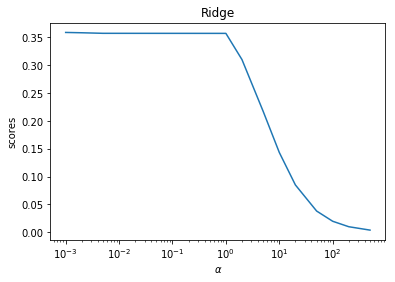

In [8]:
test_ridge_with_alpha(X_train,X_test,y_train,y_test)

> 结论:
 $\alpha$的值超过1之后,精度会迅速下降.

### Lasso 线性回归
使用一范数做线性回归.

In [9]:
def test_lasso_with_alpha(*data):
    X_train,X_test,y_train,y_test=data
    alphas=[0.001,0.002,0.005,1,2,5,10,20,50,100,200,500]
    scores=[]
    for i,alpha in enumerate(alphas):
        regr=linear_model.Lasso(alpha=alpha)
        regr.fit(X_train,y_train)
        scores.append(regr.score(X_test,y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_title('Lasso')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r'scores')
    plt.show()
    
    

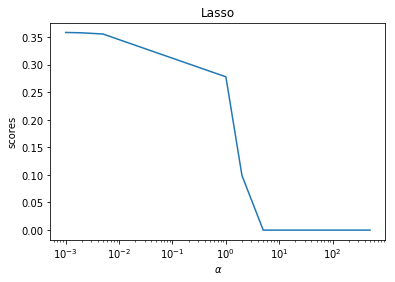

In [10]:
test_lasso_with_alpha(X_train,X_test,y_train,y_test)

> 结论: 
  一范数很陡.$\alpha$的值超过1之后,精度会迅速下降.

### ElasticNet 回归
它也是线性回归,但是它有一个更加细腻的正则化.
其实他们的损失函数都是一样的.
线性回归采用的损失函数是MSE. mean square error.
它是一个凸函数,可以找到极小值点.

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

In [54]:
def test_ElasticNet(*data):
    X_train,X_test,y_train,y_test=data
    alphas=np.logspace(-2,2)
    #print(alphas)
    rhos=np.linspace(0.01,1)
    scores=[]
    for alpha in alphas:
        for rho in rhos:
            regr = linear_model.ElasticNet(alpha=alpha,l1_ratio=rho)
            regr.fit(X_train,y_train)
            scores.append(regr.score(X_test,y_test))
    alphas,rhos=np.meshgrid(alphas,rhos)
    scores=np.array(scores).reshape(alphas.shape)
    fig=plt.figure()
    ax = Axes3D(fig)
    # cmap=cm.*** 这个负责图片显示风格,包括颜色不限于颜色.
    surf=ax.plot_surface(alphas,rhos,scores,rstride=1,cstride=1,cmap=cm.Accent_r,linewidth=0,antialiased=False)
    fig.colorbar(surf,shrink=0.5,aspect=5)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\rho$")
    ax.set_zlabel("score")
    ax.set_title("ELasticNet")
    plt.show()


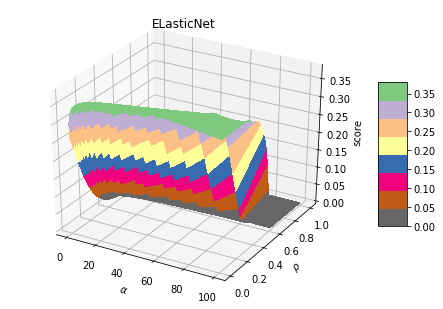

In [55]:
test_ElasticNet(X_train,X_test,y_train,y_test)

## 逻辑回归

逻辑回归是广义上的线性回归.
采用对数最大似然函数作为LossFunctions.


### sklearn  的LogisticRegresion实现了这个方案
`solver`可以选择求解最优化问题的算法,可为:
- newton-cg, 牛顿法
- lbfgs, 使用L_BFGS拟牛顿法
- liblinear 使用liblinear
- sag,使用 stochastic average Gradient descent算法

`multi_class`描述多分类问题的策略:
- ovr, 采用one-vs-rest
- mulitnomial, 采用多分类逻辑回归.

In [56]:
def load_iris_data():
    iris=datasets.load_iris()
    X_train=iris.data
    y_train=iris.target
    X_train,X_test,y_train,y_test=model_selection.train_test_split(X_train,y_train,test_size=0.25,random_state=0,stratify=y_train)
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=load_iris_data()

In [62]:
def test_LogisticRegression(*data):
    X_train,X_test,y_train,y_test=data
    rogr=linear_model.LogisticRegression()
    rogr.fit(X_train,y_train)
    score=rogr.score(X_test,y_test)
    print("Coef:%s,b:%s" %(rogr.coef_,rogr.intercept_))
    print("Score: %0.2f"%score)
    
test_LogisticRegression(X_train,X_test,y_train,y_test)

Coef:[[ 0.39310895  1.35470406 -2.12308303 -0.96477916]
 [ 0.22462128 -1.34888898  0.60067997 -1.24122398]
 [-1.50918214 -1.29436177  2.14150484  2.2961458 ]],b:[ 0.24122458  1.13775782 -1.09418724]
Score: 0.97


In [66]:
def test_LR_with_Multinormal(*data):
    X_train,X_test,y_train,y_test=data
    rogr=linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
    rogr.fit(X_train,y_train)
    score=rogr.score(X_test,y_test)
    print("Coef:%s,b:%s" %(rogr.coef_,rogr.intercept_))
    print("Score: %0.2f"%score)

test_LR_with_Multinormal(X_train,X_test,y_train,y_test)

Coef:[[-0.38355877  0.85547472 -2.27247977 -0.9843364 ]
 [ 0.34359635 -0.3743128  -0.03051209 -0.86129648]
 [ 0.03996242 -0.48116191  2.30299186  1.84563289]],b:[  8.79801854   2.47067549 -11.26869403]
Score: 1.00


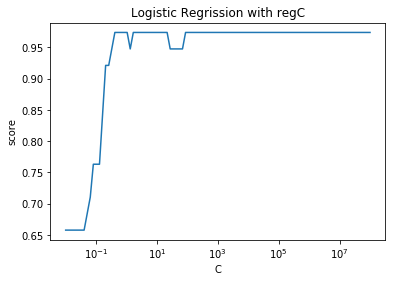

In [71]:
def test_LR_withC(*data):
    X_train,X_test,y_train,y_test=data
    C=np.logspace(-2,8,num=100)
    scores=[]
    for c in C:
        logr=linear_model.LogisticRegression(C=c)
        logr.fit(X_train,y_train)
        scores.append(logr.score(X_test,y_test))
    
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(C,scores)
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Logistic Regrission with regC")
    plt.show()
    
test_LR_withC(X_train,X_test,y_train,y_test)


In [74]:
def test_linearDiscriminantAnalysis(*data):
    X_train,X_test,y_train,y_test=data
    lda=discriminant_analysis.LinearDiscriminantAnalysis()
    lda.fit(X_train,y_train)
    print("Coef:%s,Intercept:%s" %(lda.coef_,lda.intercept_))
    print("Scores:%0.2f" %(lda.score(X_test,y_test)))

test_linearDiscriminantAnalysis(X_train,X_test,y_train,y_test)

Coef:[[  6.575853     9.75807593 -14.34026669 -21.39076537]
 [ -1.98385061  -3.49791089   4.21495042   2.60304299]
 [ -4.47116022  -6.09542385   9.85886057  18.29330864]],Intercept:[-15.33097142   0.46730077 -30.53297367]
Scores:1.00


c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


(150, 3)


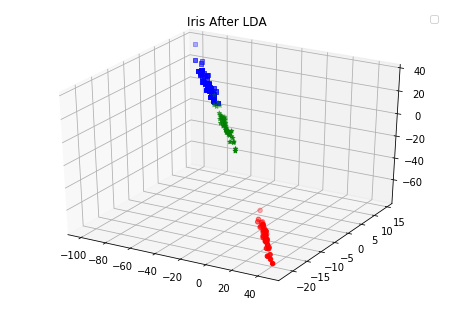

In [93]:
def plot_LDA(converted_X,y):
    #from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure()
    ax=Axes3D(fig)
    colors='rgb'
    makers='o*s'
    for target, color,maker in zip([0,1,2], colors, makers):
        pos=(y==target).ravel()
        X=converted_X[pos,:]
        ax.scatter(X[:,0],X[:,1],X[:,2],c=color,marker=maker)
    
    ax.legend(loc="best")
    fig.suptitle("Iris After LDA")
    plt.show()

    
X=np.vstack((X_train,X_test))
Y=np.vstack((y_train.reshape(y_train.size,1),y_test.reshape(y_test.size,1)))
lda=discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X,Y)
converted_X=np.dot(X,np.transpose(lda.coef_))+lda.intercept_
print(converted_X.shape)
plot_LDA(converted_X,Y)

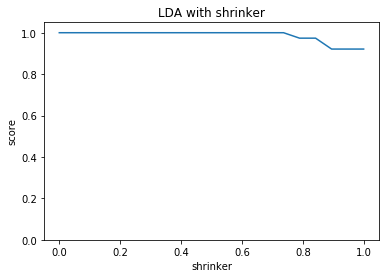

In [92]:
def test_LDA_Shrinker(*data):
    X_train,X_test,y_train,y_test=data
    shrinkers=np.linspace(0.0,1.0,num=20)
    scores=[]
    for shrinker in shrinkers:
        lda=discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr',shrinkage=shrinker)
        lda.fit(X_train,y_train)
        scores.append(lda.score(X_test,y_test))
    
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(shrinkers,scores)
    ax.set_xlabel(r"shrinker")
    ax.set_ylabel(r"score")
    ax.set_ylim(0,1.05)
    ax.set_title("LDA with shrinker")
    plt.show()
    
test_LDA_Shrinker(X_train,X_test,y_train,y_test)
